In [9]:
from mat4py import loadmat
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mne.viz import plot_topomap 
import copy

In [10]:
from email.mime import base


channels = loadmat("ErrP_data_scripts/ErrP_channels.mat")
# for key in channels['params'].keys():
#     base_str = f"{key} = channels['params']['{key}']"
#     cur_len = len(base_str)
#     while cur_len < 60:
#         base_str += " "
#         cur_len += 1
#     out_str = base_str + f"# {channels['params'][key]}"
#     print(out_str)
fsamp = channels['params']['fsamp']                         # 512
chanlocs = channels['params']['chanlocs']                   # {'sph_theta': [25, -25, 39, 22, 0, -22, -39, 62, 45, 0, -45, -62, 90, 90, 0, -90, -90, 118, 135, -180, -135, -118, 141, 158, -180, -158, -141, 155, -180, -155, 162, -162], 'sph_phi': [16, 16, 30, 40, 44, 40, 30, 40, 58, 67, 58, 40, 44, 67, 90, 67, 44, 40, 58, 67, 58, 40, 30, 40, 44, 40, 30, 16, 21, 16, -2, -2], 'labels': ['AF3', 'AF4', 'F3', 'F1', 'Fz', 'F2', 'F4', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C3', 'C1', 'Cz', 'C2', 'C4', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P3', 'P1', 'Pz', 'P2', 'P4', 'PO3', 'POz', 'PO4', 'O1', 'O2'], 'theta': [-25, 25, -39, -22, -0.0, 22, 39, -62, -45, -0.0, 45, 62, -90, -90, -0.0, 90, 90, -118, -135, 180, 135, 118, -141, -158, 180, 158, 141, -155, 180, 155, -162, 162], 'radius': [0.4111111111111111, 0.4111111111111111, 0.33333333333333337, 0.2777777777777778, 0.25555555555555554, 0.2777777777777778, 0.33333333333333337, 0.2777777777777778, 0.17777777777777776, 0.12777777777777777, 0.17777777777777776, 0.2777777777777778, 0.25555555555555554, 0.12777777777777777, 0, 0.12777777777777777, 0.25555555555555554, 0.2777777777777778, 0.17777777777777776, 0.12777777777777777, 0.17777777777777776, 0.2777777777777778, 0.33333333333333337, 0.2777777777777778, 0.25555555555555554, 0.2777777777777778, 0.33333333333333337, 0.4111111111111111, 0.3833333333333333, 0.4111111111111111, 0.5111111111111111, 0.5111111111111111], 'sph_radius': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'sph_theta_besa': [-74, 74, -60.00000000000001, -50, 46, 50, 60.00000000000001, -50, -31.999999999999996, 23, 31.999999999999996, 50, -46, -23, 0, 23, 46, -50, -31.999999999999996, 23, 31.999999999999996, 50, -60.00000000000001, -50, 46, 50, 60.00000000000001, -74, 69, 74, -92, 92], 'sph_phi_besa': [-65, 65, -51, -68, 90, 68, 51, -28, -45, 90, 45, 28, -0.0, -0.0, 90, 0, 0, 28, 45, -90, -45, -28, 51, 68, -90, -68, -51, 65, -90, -65, 72, -72], 'X': [0.8711989604089548, 0.8711989604089548, 0.673028145070219, 0.7102640395405222, 0.7193398003386512, 0.7102640395405222, 0.673028145070219, 0.35963608187451407, 0.3747095052206851, 0.3907311284892737, 0.3747095052206851, 0.35963608187451407, 4.404685919920127e-17, 2.3925381291581112e-17, 6.123233995736766e-17, 2.3925381291581112e-17, 4.404685919920127e-17, -0.35963608187451385, -0.374709505220685, -0.3907311284892737, -0.374709505220685, -0.35963608187451385, -0.673028145070219, -0.7102640395405221, -0.7193398003386512, -0.7102640395405221, -0.673028145070219, -0.8711989604089548, -0.9335804264972017, -0.8711989604089548, -0.9504771583621137, -0.9504771583621137], 'Y': [0.4062467470153691, -0.4062467470153691, 0.5450074457687164, 0.2869652992419897, 0, -0.2869652992419897, -0.5450074457687164, 0.6763770970748587, 0.374709505220685, 0, -0.374709505220685, -0.6763770970748587, 0.7193398003386512, 0.3907311284892737, 0, -0.3907311284892737, -0.7193398003386512, 0.6763770970748589, 0.3747095052206851, -4.7850762583162224e-17, -0.3747095052206851, -0.6763770970748589, 0.5450074457687163, 0.2869652992419899, -8.809371839840254e-17, -0.2869652992419899, -0.5450074457687163, 0.40624674701536917, -1.143306281056419e-16, -0.40624674701536917, 0.30882874957133405, -0.30882874957133405], 'Z': [0.27563735581699916, 0.27563735581699916, 0.49999999999999994, 0.6427876096865393, 0.6946583704589973, 0.6427876096865393, 0.49999999999999994, 0.6427876096865393, 0.8480480961564261, 0.9205048534524404, 0.8480480961564261, 0.6427876096865393, 0.6946583704589973, 0.9205048534524404, 1, 0.9205048534524404, 0.6946583704589973, 0.6427876096865393, 0.8480480961564261, 0.9205048534524404, 0.8480480961564261, 0.6427876096865393, 0.49999999999999994, 0.6427876096865393, 0.6946583704589973, 0.6427876096865393, 0.49999999999999994, 0.27563735581699916, 0.35836794954530027, 0.27563735581699916, -0.03489949670250097, -0.03489949670250097]}
channames = channels['params']['chanlocs']['labels']        # list of labels in order
eegChannels = channels['params']['eegChannels']             # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
eogChannels = channels['params']['eogChannels']             # [33, 34, 35]
triggerChannel = channels['params']['triggerChannel']       # 36
nTrialsRun = channels['params']['nTrialsRun']               # 32
nRuns = channels['params']['nRuns']                         # 10
nChannels = channels['params']['nChannels']                 # 32
channelPlot = channels['params']['channelPlot']             # 15
plotOption = channels['params']['plotOption']               # ['LineWidth', 2]
plotColor = channels['params']['plotColor']                 # [[0.12156862745098039, 0.47058823529411764, 0.7058823529411765], [0.2, 0.6274509803921569, 0.17254901960784313], [0.8901960784313725, 0.10196078431372549, 0.10980392156862745], [1.0, 0.4980392156862745, 0.0], [0.6509803921568628, 0.807843137254902, 0.8901960784313725], [0.6980392156862745, 0.8745098039215686, 0.5411764705882353], [0.984313725490196, 0.6039215686274509, 0.6], [0.9921568627450981, 0.7490196078431373, 0.43529411764705883]]
behavior = channels['params']['behavior']                   # {'fsamp': 83.33333333333333}
epochSample = channels['params']['epochSample']             # [-511, -510, -509, -508, -507, -506, -505, -504, -503, -502, -501, -500, -499, -498, -497, -496, -495, -494, -493, -492, -491, -490, -489, -488, -487, -486, -485, -484, -483, -482, -481, -480, -479, -478, -477, -476, -475, -474, -473, -472, -471, -470, -469, -468, -467, -466, -465, -464, -463, -462, -461, -460, -459, -458, -457, -456, -455, -454, -453, -452, -451, -450, -449, -448, -447, -446, -445, -444, -443, -442, -441, -440, -439, -438, -437, -436, -435, -434, -433, -432, -431, -430, -429, -428, -427, -426, -425, -424, -423, -422, -421, -420, -419, -418, -417, -416, -415, -414, -413, -412, -411, -410, -409, -408, -407, -406, -405, -404, -403, -402, -401, -400, -399, -398, -397, -396, -395, -394, -393, -392, -391, -390, -389, -388, -387, -386, -385, -384, -383, -382, -381, -380, -379, -378, -377, -376, -375, -374, -373, -372, -371, -370, -369, -368, -367, -366, -365, -364, -363, -362, -361, -360, -359, -358, -357, -356, -355, -354, -353, -352, -351, -350, -349, -348, -347, -346, -345, -344, -343, -342, -341, -340, -339, -338, -337, -336, -335, -334, -333, -332, -331, -330, -329, -328, -327, -326, -325, -324, -323, -322, -321, -320, -319, -318, -317, -316, -315, -314, -313, -312, -311, -310, -309, -308, -307, -306, -305, -304, -303, -302, -301, -300, -299, -298, -297, -296, -295, -294, -293, -292, -291, -290, -289, -288, -287, -286, -285, -284, -283, -282, -281, -280, -279, -278, -277, -276, -275, -274, -273, -272, -271, -270, -269, -268, -267, -266, -265, -264, -263, -262, -261, -260, -259, -258, -257, -256, -255, -254, -253, -252, -251, -250, -249, -248, -247, -246, -245, -244, -243, -242, -241, -240, -239, -238, -237, -236, -235, -234, -233, -232, -231, -230, -229, -228, -227, -226, -225, -224, -223, -222, -221, -220, -219, -218, -217, -216, -215, -214, -213, -212, -211, -210, -209, -208, -207, -206, -205, -204, -203, -202, -201, -200, -199, -198, -197, -196, -195, -194, -193, -192, -191, -190, -189, -188, -187, -186, -185, -184, -183, -182, -181, -180, -179, -178, -177, -176, -175, -174, -173, -172, -171, -170, -169, -168, -167, -166, -165, -164, -163, -162, -161, -160, -159, -158, -157, -156, -155, -154, -153, -152, -151, -150, -149, -148, -147, -146, -145, -144, -143, -142, -141, -140, -139, -138, -137, -136, -135, -134, -133, -132, -131, -130, -129, -128, -127, -126, -125, -124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114, -113, -112, -111, -110, -109, -108, -107, -106, -105, -104, -103, -102, -101, -100, -99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512]
epochTime = channels['params']['epochTime']                 # [-0.998046875, -0.99609375, -0.994140625, -0.9921875, -0.990234375, -0.98828125, -0.986328125, -0.984375, -0.982421875, -0.98046875, -0.978515625, -0.9765625, -0.974609375, -0.97265625, -0.970703125, -0.96875, -0.966796875, -0.96484375, -0.962890625, -0.9609375, -0.958984375, -0.95703125, -0.955078125, -0.953125, -0.951171875, -0.94921875, -0.947265625, -0.9453125, -0.943359375, -0.94140625, -0.939453125, -0.9375, -0.935546875, -0.93359375, -0.931640625, -0.9296875, -0.927734375, -0.92578125, -0.923828125, -0.921875, -0.919921875, -0.91796875, -0.916015625, -0.9140625, -0.912109375, -0.91015625, -0.908203125, -0.90625, -0.904296875, -0.90234375, -0.900390625, -0.8984375, -0.896484375, -0.89453125, -0.892578125, -0.890625, -0.888671875, -0.88671875, -0.884765625, -0.8828125, -0.880859375, -0.87890625, -0.876953125, -0.875, -0.873046875, -0.87109375, -0.869140625, -0.8671875, -0.865234375, -0.86328125, -0.861328125, -0.859375, -0.857421875, -0.85546875, -0.853515625, -0.8515625, -0.849609375, -0.84765625, -0.845703125, -0.84375, -0.841796875, -0.83984375, -0.837890625, -0.8359375, -0.833984375, -0.83203125, -0.830078125, -0.828125, -0.826171875, -0.82421875, -0.822265625, -0.8203125, -0.818359375, -0.81640625, -0.814453125, -0.8125, -0.810546875, -0.80859375, -0.806640625, -0.8046875, -0.802734375, -0.80078125, -0.798828125, -0.796875, -0.794921875, -0.79296875, -0.791015625, -0.7890625, -0.787109375, -0.78515625, -0.783203125, -0.78125, -0.779296875, -0.77734375, -0.775390625, -0.7734375, -0.771484375, -0.76953125, -0.767578125, -0.765625, -0.763671875, -0.76171875, -0.759765625, -0.7578125, -0.755859375, -0.75390625, -0.751953125, -0.75, -0.748046875, -0.74609375, -0.744140625, -0.7421875, -0.740234375, -0.73828125, -0.736328125, -0.734375, -0.732421875, -0.73046875, -0.728515625, -0.7265625, -0.724609375, -0.72265625, -0.720703125, -0.71875, -0.716796875, -0.71484375, -0.712890625, -0.7109375, -0.708984375, -0.70703125, -0.705078125, -0.703125, -0.701171875, -0.69921875, -0.697265625, -0.6953125, -0.693359375, -0.69140625, -0.689453125, -0.6875, -0.685546875, -0.68359375, -0.681640625, -0.6796875, -0.677734375, -0.67578125, -0.673828125, -0.671875, -0.669921875, -0.66796875, -0.666015625, -0.6640625, -0.662109375, -0.66015625, -0.658203125, -0.65625, -0.654296875, -0.65234375, -0.650390625, -0.6484375, -0.646484375, -0.64453125, -0.642578125, -0.640625, -0.638671875, -0.63671875, -0.634765625, -0.6328125, -0.630859375, -0.62890625, -0.626953125, -0.625, -0.623046875, -0.62109375, -0.619140625, -0.6171875, -0.615234375, -0.61328125, -0.611328125, -0.609375, -0.607421875, -0.60546875, -0.603515625, -0.6015625, -0.599609375, -0.59765625, -0.595703125, -0.59375, -0.591796875, -0.58984375, -0.587890625, -0.5859375, -0.583984375, -0.58203125, -0.580078125, -0.578125, -0.576171875, -0.57421875, -0.572265625, -0.5703125, -0.568359375, -0.56640625, -0.564453125, -0.5625, -0.560546875, -0.55859375, -0.556640625, -0.5546875, -0.552734375, -0.55078125, -0.548828125, -0.546875, -0.544921875, -0.54296875, -0.541015625, -0.5390625, -0.537109375, -0.53515625, -0.533203125, -0.53125, -0.529296875, -0.52734375, -0.525390625, -0.5234375, -0.521484375, -0.51953125, -0.517578125, -0.515625, -0.513671875, -0.51171875, -0.509765625, -0.5078125, -0.505859375, -0.50390625, -0.501953125, -0.5, -0.498046875, -0.49609375, -0.494140625, -0.4921875, -0.490234375, -0.48828125, -0.486328125, -0.484375, -0.482421875, -0.48046875, -0.478515625, -0.4765625, -0.474609375, -0.47265625, -0.470703125, -0.46875, -0.466796875, -0.46484375, -0.462890625, -0.4609375, -0.458984375, -0.45703125, -0.455078125, -0.453125, -0.451171875, -0.44921875, -0.447265625, -0.4453125, -0.443359375, -0.44140625, -0.439453125, -0.4375, -0.435546875, -0.43359375, -0.431640625, -0.4296875, -0.427734375, -0.42578125, -0.423828125, -0.421875, -0.419921875, -0.41796875, -0.416015625, -0.4140625, -0.412109375, -0.41015625, -0.408203125, -0.40625, -0.404296875, -0.40234375, -0.400390625, -0.3984375, -0.396484375, -0.39453125, -0.392578125, -0.390625, -0.388671875, -0.38671875, -0.384765625, -0.3828125, -0.380859375, -0.37890625, -0.376953125, -0.375, -0.373046875, -0.37109375, -0.369140625, -0.3671875, -0.365234375, -0.36328125, -0.361328125, -0.359375, -0.357421875, -0.35546875, -0.353515625, -0.3515625, -0.349609375, -0.34765625, -0.345703125, -0.34375, -0.341796875, -0.33984375, -0.337890625, -0.3359375, -0.333984375, -0.33203125, -0.330078125, -0.328125, -0.326171875, -0.32421875, -0.322265625, -0.3203125, -0.318359375, -0.31640625, -0.314453125, -0.3125, -0.310546875, -0.30859375, -0.306640625, -0.3046875, -0.302734375, -0.30078125, -0.298828125, -0.296875, -0.294921875, -0.29296875, -0.291015625, -0.2890625, -0.287109375, -0.28515625, -0.283203125, -0.28125, -0.279296875, -0.27734375, -0.275390625, -0.2734375, -0.271484375, -0.26953125, -0.267578125, -0.265625, -0.263671875, -0.26171875, -0.259765625, -0.2578125, -0.255859375, -0.25390625, -0.251953125, -0.25, -0.248046875, -0.24609375, -0.244140625, -0.2421875, -0.240234375, -0.23828125, -0.236328125, -0.234375, -0.232421875, -0.23046875, -0.228515625, -0.2265625, -0.224609375, -0.22265625, -0.220703125, -0.21875, -0.216796875, -0.21484375, -0.212890625, -0.2109375, -0.208984375, -0.20703125, -0.205078125, -0.203125, -0.201171875, -0.19921875, -0.197265625, -0.1953125, -0.193359375, -0.19140625, -0.189453125, -0.1875, -0.185546875, -0.18359375, -0.181640625, -0.1796875, -0.177734375, -0.17578125, -0.173828125, -0.171875, -0.169921875, -0.16796875, -0.166015625, -0.1640625, -0.162109375, -0.16015625, -0.158203125, -0.15625, -0.154296875, -0.15234375, -0.150390625, -0.1484375, -0.146484375, -0.14453125, -0.142578125, -0.140625, -0.138671875, -0.13671875, -0.134765625, -0.1328125, -0.130859375, -0.12890625, -0.126953125, -0.125, -0.123046875, -0.12109375, -0.119140625, -0.1171875, -0.115234375, -0.11328125, -0.111328125, -0.109375, -0.107421875, -0.10546875, -0.103515625, -0.1015625, -0.099609375, -0.09765625, -0.095703125, -0.09375, -0.091796875, -0.08984375, -0.087890625, -0.0859375, -0.083984375, -0.08203125, -0.080078125, -0.078125, -0.076171875, -0.07421875, -0.072265625, -0.0703125, -0.068359375, -0.06640625, -0.064453125, -0.0625, -0.060546875, -0.05859375, -0.056640625, -0.0546875, -0.052734375, -0.05078125, -0.048828125, -0.046875, -0.044921875, -0.04296875, -0.041015625, -0.0390625, -0.037109375, -0.03515625, -0.033203125, -0.03125, -0.029296875, -0.02734375, -0.025390625, -0.0234375, -0.021484375, -0.01953125, -0.017578125, -0.015625, -0.013671875, -0.01171875, -0.009765625, -0.0078125, -0.005859375, -0.00390625, -0.001953125, 0.0, 0.001953125, 0.00390625, 0.005859375, 0.0078125, 0.009765625, 0.01171875, 0.013671875, 0.015625, 0.017578125, 0.01953125, 0.021484375, 0.0234375, 0.025390625, 0.02734375, 0.029296875, 0.03125, 0.033203125, 0.03515625, 0.037109375, 0.0390625, 0.041015625, 0.04296875, 0.044921875, 0.046875, 0.048828125, 0.05078125, 0.052734375, 0.0546875, 0.056640625, 0.05859375, 0.060546875, 0.0625, 0.064453125, 0.06640625, 0.068359375, 0.0703125, 0.072265625, 0.07421875, 0.076171875, 0.078125, 0.080078125, 0.08203125, 0.083984375, 0.0859375, 0.087890625, 0.08984375, 0.091796875, 0.09375, 0.095703125, 0.09765625, 0.099609375, 0.1015625, 0.103515625, 0.10546875, 0.107421875, 0.109375, 0.111328125, 0.11328125, 0.115234375, 0.1171875, 0.119140625, 0.12109375, 0.123046875, 0.125, 0.126953125, 0.12890625, 0.130859375, 0.1328125, 0.134765625, 0.13671875, 0.138671875, 0.140625, 0.142578125, 0.14453125, 0.146484375, 0.1484375, 0.150390625, 0.15234375, 0.154296875, 0.15625, 0.158203125, 0.16015625, 0.162109375, 0.1640625, 0.166015625, 0.16796875, 0.169921875, 0.171875, 0.173828125, 0.17578125, 0.177734375, 0.1796875, 0.181640625, 0.18359375, 0.185546875, 0.1875, 0.189453125, 0.19140625, 0.193359375, 0.1953125, 0.197265625, 0.19921875, 0.201171875, 0.203125, 0.205078125, 0.20703125, 0.208984375, 0.2109375, 0.212890625, 0.21484375, 0.216796875, 0.21875, 0.220703125, 0.22265625, 0.224609375, 0.2265625, 0.228515625, 0.23046875, 0.232421875, 0.234375, 0.236328125, 0.23828125, 0.240234375, 0.2421875, 0.244140625, 0.24609375, 0.248046875, 0.25, 0.251953125, 0.25390625, 0.255859375, 0.2578125, 0.259765625, 0.26171875, 0.263671875, 0.265625, 0.267578125, 0.26953125, 0.271484375, 0.2734375, 0.275390625, 0.27734375, 0.279296875, 0.28125, 0.283203125, 0.28515625, 0.287109375, 0.2890625, 0.291015625, 0.29296875, 0.294921875, 0.296875, 0.298828125, 0.30078125, 0.302734375, 0.3046875, 0.306640625, 0.30859375, 0.310546875, 0.3125, 0.314453125, 0.31640625, 0.318359375, 0.3203125, 0.322265625, 0.32421875, 0.326171875, 0.328125, 0.330078125, 0.33203125, 0.333984375, 0.3359375, 0.337890625, 0.33984375, 0.341796875, 0.34375, 0.345703125, 0.34765625, 0.349609375, 0.3515625, 0.353515625, 0.35546875, 0.357421875, 0.359375, 0.361328125, 0.36328125, 0.365234375, 0.3671875, 0.369140625, 0.37109375, 0.373046875, 0.375, 0.376953125, 0.37890625, 0.380859375, 0.3828125, 0.384765625, 0.38671875, 0.388671875, 0.390625, 0.392578125, 0.39453125, 0.396484375, 0.3984375, 0.400390625, 0.40234375, 0.404296875, 0.40625, 0.408203125, 0.41015625, 0.412109375, 0.4140625, 0.416015625, 0.41796875, 0.419921875, 0.421875, 0.423828125, 0.42578125, 0.427734375, 0.4296875, 0.431640625, 0.43359375, 0.435546875, 0.4375, 0.439453125, 0.44140625, 0.443359375, 0.4453125, 0.447265625, 0.44921875, 0.451171875, 0.453125, 0.455078125, 0.45703125, 0.458984375, 0.4609375, 0.462890625, 0.46484375, 0.466796875, 0.46875, 0.470703125, 0.47265625, 0.474609375, 0.4765625, 0.478515625, 0.48046875, 0.482421875, 0.484375, 0.486328125, 0.48828125, 0.490234375, 0.4921875, 0.494140625, 0.49609375, 0.498046875, 0.5, 0.501953125, 0.50390625, 0.505859375, 0.5078125, 0.509765625, 0.51171875, 0.513671875, 0.515625, 0.517578125, 0.51953125, 0.521484375, 0.5234375, 0.525390625, 0.52734375, 0.529296875, 0.53125, 0.533203125, 0.53515625, 0.537109375, 0.5390625, 0.541015625, 0.54296875, 0.544921875, 0.546875, 0.548828125, 0.55078125, 0.552734375, 0.5546875, 0.556640625, 0.55859375, 0.560546875, 0.5625, 0.564453125, 0.56640625, 0.568359375, 0.5703125, 0.572265625, 0.57421875, 0.576171875, 0.578125, 0.580078125, 0.58203125, 0.583984375, 0.5859375, 0.587890625, 0.58984375, 0.591796875, 0.59375, 0.595703125, 0.59765625, 0.599609375, 0.6015625, 0.603515625, 0.60546875, 0.607421875, 0.609375, 0.611328125, 0.61328125, 0.615234375, 0.6171875, 0.619140625, 0.62109375, 0.623046875, 0.625, 0.626953125, 0.62890625, 0.630859375, 0.6328125, 0.634765625, 0.63671875, 0.638671875, 0.640625, 0.642578125, 0.64453125, 0.646484375, 0.6484375, 0.650390625, 0.65234375, 0.654296875, 0.65625, 0.658203125, 0.66015625, 0.662109375, 0.6640625, 0.666015625, 0.66796875, 0.669921875, 0.671875, 0.673828125, 0.67578125, 0.677734375, 0.6796875, 0.681640625, 0.68359375, 0.685546875, 0.6875, 0.689453125, 0.69140625, 0.693359375, 0.6953125, 0.697265625, 0.69921875, 0.701171875, 0.703125, 0.705078125, 0.70703125, 0.708984375, 0.7109375, 0.712890625, 0.71484375, 0.716796875, 0.71875, 0.720703125, 0.72265625, 0.724609375, 0.7265625, 0.728515625, 0.73046875, 0.732421875, 0.734375, 0.736328125, 0.73828125, 0.740234375, 0.7421875, 0.744140625, 0.74609375, 0.748046875, 0.75, 0.751953125, 0.75390625, 0.755859375, 0.7578125, 0.759765625, 0.76171875, 0.763671875, 0.765625, 0.767578125, 0.76953125, 0.771484375, 0.7734375, 0.775390625, 0.77734375, 0.779296875, 0.78125, 0.783203125, 0.78515625, 0.787109375, 0.7890625, 0.791015625, 0.79296875, 0.794921875, 0.796875, 0.798828125, 0.80078125, 0.802734375, 0.8046875, 0.806640625, 0.80859375, 0.810546875, 0.8125, 0.814453125, 0.81640625, 0.818359375, 0.8203125, 0.822265625, 0.82421875, 0.826171875, 0.828125, 0.830078125, 0.83203125, 0.833984375, 0.8359375, 0.837890625, 0.83984375, 0.841796875, 0.84375, 0.845703125, 0.84765625, 0.849609375, 0.8515625, 0.853515625, 0.85546875, 0.857421875, 0.859375, 0.861328125, 0.86328125, 0.865234375, 0.8671875, 0.869140625, 0.87109375, 0.873046875, 0.875, 0.876953125, 0.87890625, 0.880859375, 0.8828125, 0.884765625, 0.88671875, 0.888671875, 0.890625, 0.892578125, 0.89453125, 0.896484375, 0.8984375, 0.900390625, 0.90234375, 0.904296875, 0.90625, 0.908203125, 0.91015625, 0.912109375, 0.9140625, 0.916015625, 0.91796875, 0.919921875, 0.921875, 0.923828125, 0.92578125, 0.927734375, 0.9296875, 0.931640625, 0.93359375, 0.935546875, 0.9375, 0.939453125, 0.94140625, 0.943359375, 0.9453125, 0.947265625, 0.94921875, 0.951171875, 0.953125, 0.955078125, 0.95703125, 0.958984375, 0.9609375, 0.962890625, 0.96484375, 0.966796875, 0.96875, 0.970703125, 0.97265625, 0.974609375, 0.9765625, 0.978515625, 0.98046875, 0.982421875, 0.984375, 0.986328125, 0.98828125, 0.990234375, 0.9921875, 0.994140625, 0.99609375, 0.998046875, 1.0]
epochOnset = channels['params']['epochOnset']               # 512
epochRejection = channels['params']['epochRejection']       # {'isCompute': 0, 'threshold': 100}
channelRemoval = channels['params']['channelRemoval']       # {'isCompute': 0}
spectralFilter = channels['params']['spectralFilter']       # {'freqs': [1, 15], 'order': 2, 'a': [1.0, -3.7537756919003438, 5.292343392355104, -3.322862256930553, 0.7842990961813561], 'b': [0.006567272344755099, 0.0, -0.013134544689510199, 0.0, 0.006567272344755099]}
spatialFilter = channels['params']['spatialFilter']         # {'type': 'CCA', 'time': [615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922], 'nComp': 3}
resample = channels['params']['resample']                   # {'is_compute': 1, 'ratio': 16, 'time': [615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922]}
psd = channels['params']['psd']                             # {'is_compute': 1, 'type': 'pwelch', 'time': [615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922], 'window': [[0.00010336364660290531], [0.00041341185023785476], [0.0009300164200530814], [0.0016529637635198102], [0.002581954974743117], [0.003716605958046071], [0.0050564475867755365], [0.006600925897265131], [0.008349402317873789], [0.010301153933006124], [0.012455373782005286], [0.014811171192794681], [0.017367572150130073], [0.020123519698310943], [0.02307787437818365], [0.026229414698255904], [0.029576837639728015], [0.03311875919523227], [0.036853714941056825], [0.04078016064261847], [0.044896472892933637], [0.04920094978382333], [0.053691811609574924], [0.05836720160276959], [0.06322518670197141], [0.06826375835096038], [0.07348083332917921], [0.07887425461305059], [0.08444179226780824], [0.09018114436947372], [0.0960899379565976], [0.10216573001137119], [0.10840600846970322], [0.11480819325984476], [0.12136963736913114], [0.128087627938402], [0.13495938738364488], [0.14198207454440054], [0.14915278585845337], [0.15646855656232278], [0.16392636191705812], [0.1715231184588309], [0.17925568527380703], [0.1871208652967722], [0.1951154066329729], [0.20323600390262736], [0.2114792996075503], [0.219841885519325], [0.22832030408845222], [0.23691104987388906], [0.24561057099238964], [0.25441527058704827], [0.2633215083144351], [0.27232560184971444], [0.2814238284091175], [0.29061242628914513], [0.299887596421861], [0.3092455039456342], [0.31868227979067965], [0.32819402227874345], [0.337776798736269], [0.34742664712037935], [0.35713957765700205], [0.3669115744904592], [0.3767385973438414], [0.3866165831894795], [0.3965414479288208], [0.4065090880810195], [0.41651538247953895], [0.4265561939760669], [0.43662737115103917], [0.44672475003006196], [0.4568441558055269], [0.46698140456270465], [0.4771323050096027], [0.48729266020987533], [0.49745826931806525], [0.507624929316463], [0.5177884367528638], [0.527944589478504], [0.5380891883854589], [0.5482180391427831], [0.5583269539306762], [0.568411753171955], [0.5784682672601206], [0.5884923382832995], [0.5984798217433529], [0.6084265882694376], [0.6183285253253136], [0.6281815389096901], [0.6379815552489112], [0.6477245224812744], [0.6574064123322924], [0.667023221780201], [0.6765709747110272], [0.686045723562532], [0.6954435509563477], [0.7047605713176357], [0.7139929324815963], [0.7231368172861629], [0.7321884451502251], [0.741144073636728], [0.7499999999999999], [0.7587525627166691], [0.7673981429995371], [0.7759331662937841], [0.7843541037548838], [0.7926574737076209], [0.8008398430856062], [0.8088978288506923], [0.8168280993917076], [0.8246273759019253], [0.8322924337347013], [0.8398201037367201], [0.8472072735582941], [0.8544508889401798], [0.8615479549763756], [0.8684955373523785], [0.8752907635583911], [0.8819308240769723], [0.8884129735446471], [0.8947345318869881], [0.9008928854267052], [0.906885487964283], [0.9127098618307177], [0.918363598911921], [0.9238443616443666], [0.9291498839815656], [0.9342779723309743], [0.9392265064609453], [0.9439934403773466], [0.9485768031694871], [0.9529746998249993], [0.9571853120133405], [0.9612068988375896], [0.9650377975542297], [0.9686764242606163], [0.9721212745498493], [0.9753709241327772], [0.9784240294268756], [0.981279328111758], [0.9839356396510874], [0.9863918657806752], [0.9886469909625625], [0.9907000828049001], [0.9925502924474494], [0.9941968549125481], [0.9956390894213929], [0.9968763996755116], [0.9979082741033046], [0.9987342860715575], [0.9993540940618333], [0.9997674418116758], [0.999974158420562], [0.999974158420562], [0.9997674418116758], [0.9993540940618333], [0.9987342860715575], [0.9979082741033046], [0.9968763996755116], [0.9956390894213929], [0.9941968549125481], [0.9925502924474494], [0.9907000828049001], [0.9886469909625625], [0.9863918657806752], [0.9839356396510874], [0.981279328111758], [0.9784240294268756], [0.9753709241327772], [0.9721212745498493], [0.9686764242606163], [0.9650377975542297], [0.9612068988375896], [0.9571853120133405], [0.9529746998249993], [0.9485768031694871], [0.9439934403773466], [0.9392265064609453], [0.9342779723309743], [0.9291498839815656], [0.9238443616443666], [0.918363598911921], [0.9127098618307177], [0.906885487964283], [0.9008928854267052], [0.8947345318869881], [0.8884129735446471], [0.8819308240769723], [0.8752907635583911], [0.8684955373523785], [0.8615479549763756], [0.8544508889401798], [0.8472072735582941], [0.8398201037367201], [0.8322924337347013], [0.8246273759019253], [0.8168280993917076], [0.8088978288506923], [0.8008398430856062], [0.7926574737076209], [0.7843541037548838], [0.7759331662937841], [0.7673981429995371], [0.7587525627166691], [0.7499999999999999], [0.741144073636728], [0.7321884451502251], [0.7231368172861629], [0.7139929324815963], [0.7047605713176357], [0.6954435509563477], [0.686045723562532], [0.6765709747110272], [0.667023221780201], [0.6574064123322924], [0.6477245224812744], [0.6379815552489112], [0.6281815389096901], [0.6183285253253136], [0.6084265882694376], [0.5984798217433529], [0.5884923382832995], [0.5784682672601206], [0.568411753171955], [0.5583269539306762], [0.5482180391427831], [0.5380891883854589], [0.527944589478504], [0.5177884367528638], [0.507624929316463], [0.49745826931806525], [0.48729266020987533], [0.4771323050096027], [0.46698140456270465], [0.4568441558055269], [0.44672475003006196], [0.43662737115103917], [0.4265561939760669], [0.41651538247953895], [0.4065090880810195], [0.3965414479288208], [0.3866165831894795], [0.3767385973438414], [0.3669115744904592], [0.35713957765700205], [0.34742664712037935], [0.337776798736269], [0.32819402227874345], [0.31868227979067965], [0.3092455039456342], [0.299887596421861], [0.29061242628914513], [0.2814238284091175], [0.27232560184971444], [0.2633215083144351], [0.25441527058704827], [0.24561057099238964], [0.23691104987388906], [0.22832030408845222], [0.219841885519325], [0.2114792996075503], [0.20323600390262736], [0.1951154066329729], [0.1871208652967722], [0.17925568527380703], [0.1715231184588309], [0.16392636191705812], [0.15646855656232278], [0.14915278585845337], [0.14198207454440054], [0.13495938738364488], [0.128087627938402], [0.12136963736913114], [0.11480819325984476], [0.10840600846970322], [0.10216573001137119], [0.0960899379565976], [0.09018114436947372], [0.08444179226780824], [0.07887425461305059], [0.07348083332917921], [0.06826375835096038], [0.06322518670197141], [0.05836720160276959], [0.053691811609574924], [0.04920094978382333], [0.044896472892933637], [0.04078016064261847], [0.036853714941056825], [0.03311875919523227], [0.029576837639728015], [0.026229414698255904], [0.02307787437818365], [0.020123519698310943], [0.017367572150130073], [0.014811171192794681], [0.012455373782005286], [0.010301153933006124], [0.008349402317873789], [0.006600925897265131], [0.0050564475867755365], [0.003716605958046071], [0.002581954974743117], [0.0016529637635198102], [0.0009300164200530814], [0.00041341185023785476], [0.00010336364660290531]], 'nfft': 2048, 'overlap': [], 'freq_range': [4, 6, 8, 10, 12, 14], 'stockwell': {'resample': 8}}
riemann = channels['params']['riemann']                     # {'is_compute': 0, 'time': [513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922], 'type': 'riemann', 'base': 2, 'is_plot': 1}
classify = channels['params']['classify']                   # {'is_normalize': 1, 'reduction': {'type': 'None'}, 'type': 'diaglinear'}

In [11]:
data_mat = sio.loadmat("ErrP_data_scripts/ErrP_data_HW1.mat")
data = data_mat['trainingEpochs']
sensor_data = np.moveaxis(np.moveaxis(data[0][0][0], 2, 0), 2, 1)
trial_labels = data[0][0][1]              # 0 marks a correct trial and 1 marks an error trial
trial_magnitudes = data[0][0][2]          # magnitudes can be of 0, 3, 6, 9, 12 degrees; the larger the magnitude, the more obvious the erroneous event. 
trial_run = data[0][0][3]                 # run number
sensor_data.shape

(320, 32, 1024)

In [12]:
time_start_in_samples = 410
time_end_in_samples = 922

cz_chan = 14
data_windowed = sensor_data[:,:,time_start_in_samples:time_end_in_samples]

magnitudes_data = np.zeros((5, 32, 512))               # [0] = mag0, [1] = mag3, [2] = mag6, [3] = mag9, [4] = mag12
magnitudes_counters = np.zeros((5))

for trial, mag in enumerate(trial_magnitudes):
    if mag[0] == 0:
        magnitudes_data[0] += data_windowed[trial,:,:]
        magnitudes_counters[0] += 1
    elif mag[0] == 3:
        magnitudes_data[1] += data_windowed[trial,:,:]
        magnitudes_counters[1] += 1
    elif mag[0] == 6:
        magnitudes_data[2] += data_windowed[trial,:,:]
        magnitudes_counters[2] += 1
    elif mag[0] == 9:
        magnitudes_data[3] += data_windowed[trial,:,:]
        magnitudes_counters[3] += 1    
    elif mag[0] == 12:
        magnitudes_data[4] += data_windowed[trial,:,:]
        magnitudes_counters[4] += 1
    else:
        raise Exception(f"Unrecognized magnitude: {mag[0]}")


print(magnitudes_counters)

magnitudes_data[0] /= magnitudes_counters[0]
magnitudes_data[1] /= magnitudes_counters[1]
magnitudes_data[2] /= magnitudes_counters[2]
magnitudes_data[3] /= magnitudes_counters[3]
magnitudes_data[4] /= magnitudes_counters[4]


[160.  40.  40.  40.  40.]


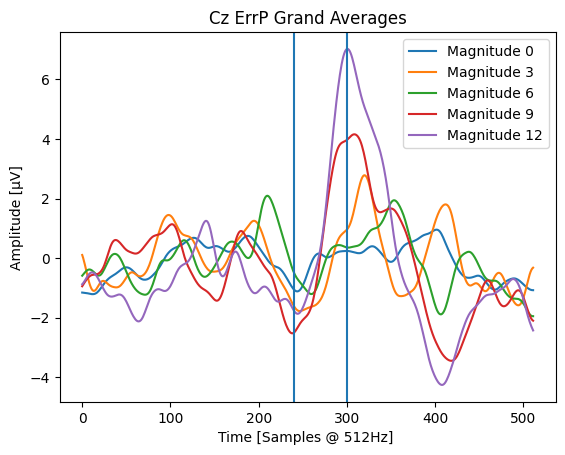

In [13]:
plt.title("Cz ErrP Grand Averages")
plt.plot(magnitudes_data[0][14], label="Magnitude 0")
plt.plot(magnitudes_data[1][14], label="Magnitude 3")
plt.plot(magnitudes_data[2][14], label="Magnitude 6")
plt.plot(magnitudes_data[3][14], label="Magnitude 9")
plt.plot(magnitudes_data[4][14], label="Magnitude 12")
plt.axvline(x=240)
plt.axvline(x=300)
plt.xlabel("Time [Samples @ 512Hz] ")
plt.ylabel("Amplitude [μV]")
plt.legend()

ERN and Pe happen at around sample 240 and 300 respectively, w.r.t. the window used in the plot [-0.2s-0.8s] 

In [14]:
# Get the magnitudes for only the trials with errors, which happens to be all trials from magnitude 3-12 and none from magnitude 0
magnitudes_data_errors = np.zeros((4, 32, 512))               # [0] = mag3, [1] = mag6, [2] = mag9, [3] = mag12
magnitudes_counters = np.zeros((4))

for trial, mag in enumerate(trial_magnitudes):
    if trial_labels[trial][0] == 1:
        if mag[0] == 3:
            magnitudes_data_errors[0] += data_windowed[trial,:,:]
            magnitudes_counters[0] += 1
        elif mag[0] == 6:
            magnitudes_data_errors[1] += data_windowed[trial,:,:]
            magnitudes_counters[1] += 1
        elif mag[0] == 9:
            magnitudes_data_errors[2] += data_windowed[trial,:,:]
            magnitudes_counters[2] += 1
        elif mag[0] == 12:
            magnitudes_data_errors[3] += data_windowed[trial,:,:]
            magnitudes_counters[3] += 1    
        else:
            raise Exception(f"Unrecognized magnitude: {mag[0]}")
    elif trial_labels[trial] == 0:
        pass
    else:
        raise Exception(f"Unrecognized trial label: {trial_labels[trial]}")

magnitudes_data_errors[0] /= magnitudes_counters[0]
magnitudes_data_errors[1] /= magnitudes_counters[1]
magnitudes_data_errors[2] /= magnitudes_counters[2]
magnitudes_data_errors[3] /= magnitudes_counters[3]

Grand Average Amplitude Topoplot for ERN 
Timestamp with only error


Text(0.5, 1.0, 'label')

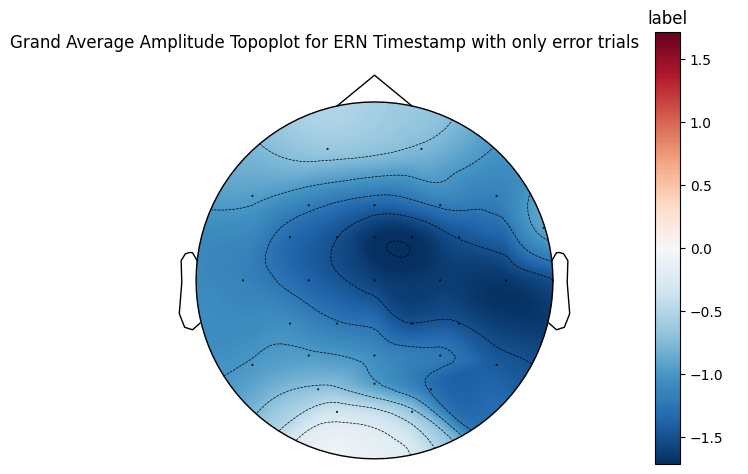

In [54]:
ERN_sample = 240
Pe_sample = 300

multi_magnitude_data_errors = (magnitudes_data_errors[0] + magnitudes_data_errors[1] + magnitudes_data_errors[2] + magnitudes_data_errors[3]) / 4

values = multi_magnitude_data_errors[:,ERN_sample]
order =  np.array([
                    (-0.025, 0.07), (0.025,0.07), # AF3, AF4
                    (-0.065,0.045),(-0.035,0.04),(0,0.04),(0.035,0.04),(0.065,0.045), # 'F3', 'F1', 'Fz', 'F2', 'F4'
                    (-0.045,0.023), (-0.02,0.023), (0,0.023), (0.02,0.023), (0.045,0.023), # 'FC3', 'FC1', 'FCz', 'FC2', 'FC4'
                    (-0.07,0), (-0.035,0), (0,0),   (0.035,0),  (0.07,0), # 'C3', 'C1', 'Cz', 'C2', 'C4'
                    (0.09,0.028), (-0.045,-0.023), (-0.02,-0.023),  (0.02,-0.023), (0.045,-0.023), # 'CP3', 'CP1', 'CPz', 'CP2', 'CP4'
                    (-0.065,-0.045), (-0.035,-0.04), (0,-0.04), (0.035,-0.04), (0.065,-0.045), # 'P3', 'P1', 'Pz', 'P2', 'P4'
                    (-0.03,-0.058), (0,-0.055), (0.03,-0.058), # 'PO3', 'POz', 'PO4'
                    (-0.02,-0.07), (0.02,-0.07) # 'O1', 'O2'
                ])
print("Grand Average Amplitude Topoplot for ERN \nTimestamp with only error")
fig,ax = plt.subplots()
im,cm   = plot_topomap(values, order, axes=ax,show=False)   
# manually fiddle the position of colorbar
ax_x_start = 0.95
ax_x_width = 0.04
ax_y_start = 0.1
ax_y_height = 0.9
ax.set_title("Grand Average Amplitude Topoplot for ERN Timestamp with only error trials                   ")
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title("label")

Grand Average Amplitude Topoplot for Pe Timestamp with only error trials


Text(0.5, 1.0, 'label')

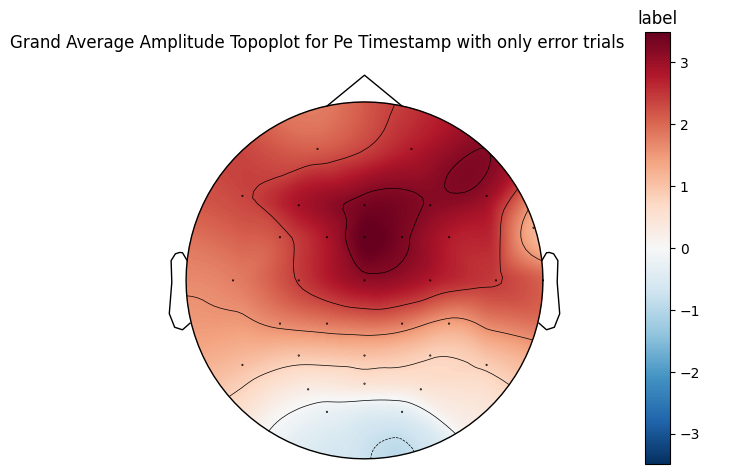

In [56]:
values = multi_magnitude_data_errors[:,Pe_sample]
order =  np.array([
                    (-0.025, 0.07), (0.025,0.07), # AF3, AF4
                    (-0.065,0.045),(-0.035,0.04),(0,0.04),(0.035,0.04),(0.065,0.045), # 'F3', 'F1', 'Fz', 'F2', 'F4'
                    (-0.045,0.023), (-0.02,0.023), (0,0.023), (0.02,0.023), (0.045,0.023), # 'FC3', 'FC1', 'FCz', 'FC2', 'FC4'
                    (-0.07,0), (-0.035,0), (0,0),   (0.035,0),  (0.07,0), # 'C3', 'C1', 'Cz', 'C2', 'C4'
                    (0.09,0.028), (-0.045,-0.023), (-0.02,-0.023),  (0.02,-0.023), (0.045,-0.023), # 'CP3', 'CP1', 'CPz', 'CP2', 'CP4'
                    (-0.065,-0.045), (-0.035,-0.04), (0,-0.04), (0.035,-0.04), (0.065,-0.045), # 'P3', 'P1', 'Pz', 'P2', 'P4'
                    (-0.03,-0.058), (0,-0.055), (0.03,-0.058), # 'PO3', 'POz', 'PO4'
                    (-0.02,-0.07), (0.02,-0.07) # 'O1', 'O2'
                ])
print("Grand Average Amplitude Topoplot for Pe Timestamp with only error trials")
fig,ax = plt.subplots()
im,cm   = plot_topomap(values, order, axes=ax,show=False)   
# manually fiddle the position of colorbar
ax.set_title("Grand Average Amplitude Topoplot for Pe Timestamp with only error trials                  ")
ax_x_start = 0.95
ax_x_width = 0.04
ax_y_start = 0.1
ax_y_height = 0.9
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title("label")

[Findings should be described here per hw question]

In [26]:
magnitudes_data_CAR = copy.deepcopy(magnitudes_data)
mean_val = np.mean(magnitudes_data_CAR[:,:,:])
print(mean_val)
for mag in range(5):
    for channel in range(32):
        for sample in range(512):
            magnitudes_data_CAR[mag,channel,sample] -= mean_val

-0.1285438240546502


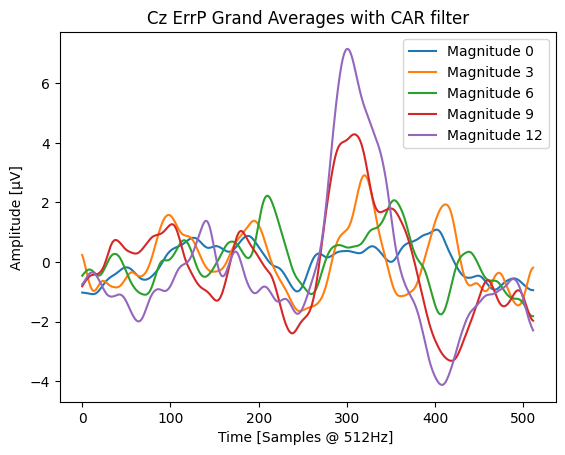

In [23]:
plt.title("Cz ErrP Grand Averages with CAR filter")
plt.plot(magnitudes_data_CAR[0][14], label="Magnitude 0")
plt.plot(magnitudes_data_CAR[1][14], label="Magnitude 3")
plt.plot(magnitudes_data_CAR[2][14], label="Magnitude 6")
plt.plot(magnitudes_data_CAR[3][14], label="Magnitude 9")
plt.plot(magnitudes_data_CAR[4][14], label="Magnitude 12")
plt.xlabel("Time [Samples @ 512Hz] ")
plt.ylabel("Amplitude [μV]")
plt.legend()

This ^ looks too similar to the original


In [27]:
#maybe grab only errors like last time?
# Get the magnitudes for only the trials with errors, which happens to be all trials from magnitude 3-12 and none from magnitude 0
# magnitudes_data_errors = np.zeros((4, 32, 512))               # [0] = mag3, [1] = mag6, [2] = mag9, [3] = mag12
# magnitudes_counters = np.zeros((4))

# for trial, mag in enumerate(trial_magnitudes):
#     if trial_labels[trial][0] == 1:
#         if mag[0] == 3:
#             magnitudes_data_errors[0] += data_windowed[trial,:,:]
#             magnitudes_counters[0] += 1
#         elif mag[0] == 6:
#             magnitudes_data_errors[1] += data_windowed[trial,:,:]
#             magnitudes_counters[1] += 1
#         elif mag[0] == 9:
#             magnitudes_data_errors[2] += data_windowed[trial,:,:]
#             magnitudes_counters[2] += 1
#         elif mag[0] == 12:
#             magnitudes_data_errors[3] += data_windowed[trial,:,:]
#             magnitudes_counters[3] += 1    
#         else:
#             raise Exception(f"Unrecognized magnitude: {mag[0]}")
#     elif trial_labels[trial] == 0:
#         pass
#     else:
#         raise Exception(f"Unrecognized trial label: {trial_labels[trial]}")

# magnitudes_data_errors[0] /= magnitudes_counters[0]
# magnitudes_data_errors[1] /= magnitudes_counters[1]
# magnitudes_data_errors[2] /= magnitudes_counters[2]
# magnitudes_data_errors[3] /= magnitudes_counters[3]

CAR Filtered Grand Average Amplitude Topoplot for ERN Timestamp with only error trials


Text(0.5, 1.0, 'label')

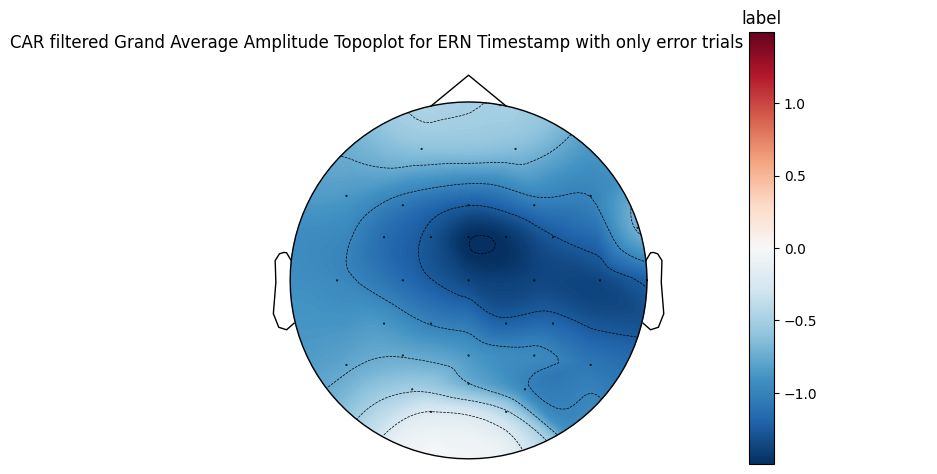

In [60]:
multi_magnitude_data_CAR = (magnitudes_data_CAR[0] + magnitudes_data_CAR[1] + magnitudes_data_CAR[2] + magnitudes_data_CAR[3] + magnitudes_data_CAR[4]) / 5

values = multi_magnitude_data_CAR[:,ERN_sample]
order =  np.array([
                    (-0.025, 0.07), (0.025,0.07), # AF3, AF4
                    (-0.065,0.045),(-0.035,0.04),(0,0.04),(0.035,0.04),(0.065,0.045), # 'F3', 'F1', 'Fz', 'F2', 'F4'
                    (-0.045,0.023), (-0.02,0.023), (0,0.023), (0.02,0.023), (0.045,0.023), # 'FC3', 'FC1', 'FCz', 'FC2', 'FC4'
                    (-0.07,0), (-0.035,0), (0,0),   (0.035,0),  (0.07,0), # 'C3', 'C1', 'Cz', 'C2', 'C4'
                    (0.09,0.028), (-0.045,-0.023), (-0.02,-0.023),  (0.02,-0.023), (0.045,-0.023), # 'CP3', 'CP1', 'CPz', 'CP2', 'CP4'
                    (-0.065,-0.045), (-0.035,-0.04), (0,-0.04), (0.035,-0.04), (0.065,-0.045), # 'P3', 'P1', 'Pz', 'P2', 'P4'
                    (-0.03,-0.058), (0,-0.055), (0.03,-0.058), # 'PO3', 'POz', 'PO4'
                    (-0.02,-0.07), (0.02,-0.07) # 'O1', 'O2'
                ])
print("CAR Filtered Grand Average Amplitude Topoplot for ERN Timestamp with only error trials")
fig,ax = plt.subplots()
im,cm   = plot_topomap(values, order, axes=ax,show=False)   
# manually fiddle the position of colorbar
ax_x_start = 0.95
ax_x_width = 0.04
ax_y_start = 0.1
ax_y_height = 0.9

ax.set_title("CAR filtered Grand Average Amplitude Topoplot for ERN Timestamp with only error trials                                   ")
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title("label")

CAR Filtered Grand Average Amplitude Topoplot for ERN Timestamp 


Text(0.5, 1.0, 'label')

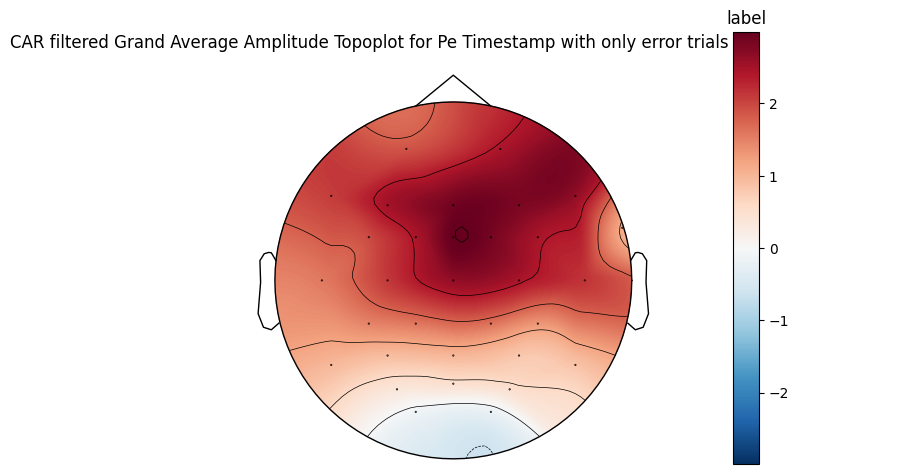

In [58]:
values = multi_magnitude_data_CAR[:,Pe_sample]
order =  np.array([
                    (-0.025, 0.07), (0.025,0.07), # AF3, AF4
                    (-0.065,0.045),(-0.035,0.04),(0,0.04),(0.035,0.04),(0.065,0.045), # 'F3', 'F1', 'Fz', 'F2', 'F4'
                    (-0.045,0.023), (-0.02,0.023), (0,0.023), (0.02,0.023), (0.045,0.023), # 'FC3', 'FC1', 'FCz', 'FC2', 'FC4'
                    (-0.07,0), (-0.035,0), (0,0),   (0.035,0),  (0.07,0), # 'C3', 'C1', 'Cz', 'C2', 'C4'
                    (0.09,0.028), (-0.045,-0.023), (-0.02,-0.023),  (0.02,-0.023), (0.045,-0.023), # 'CP3', 'CP1', 'CPz', 'CP2', 'CP4'
                    (-0.065,-0.045), (-0.035,-0.04), (0,-0.04), (0.035,-0.04), (0.065,-0.045), # 'P3', 'P1', 'Pz', 'P2', 'P4'
                    (-0.03,-0.058), (0,-0.055), (0.03,-0.058), # 'PO3', 'POz', 'PO4'
                    (-0.02,-0.07), (0.02,-0.07) # 'O1', 'O2'
                ])
print("CAR Filtered Grand Average Amplitude Topoplot for ERN Timestamp ")
fig,ax = plt.subplots()
im,cm   = plot_topomap(values, order, axes=ax,show=False)   
# manually fiddle the position of colorbar
ax_x_start = 0.95
ax_x_width = 0.04
ax_y_start = 0.1
ax_y_height = 0.9
ax.set_title("CAR filtered Grand Average Amplitude Topoplot for Pe Timestamp with only error trials                                ")
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title("label")